# Project: Investigate a Dataset of no show appointments - kagglev2 may-2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
**This dataset represents fourteen characteristics of patients who have a medical appointment. The main character in the dataset is "No-show" which states if the patient was attended or not.** **the source of dataset:** https://www.kaggle.com/datasets/joniarroba/noshowappointments

### Data Dictionary


**01 - PatientId: Identification of a patient**


**02 - AppointmentID: Identification of each appointment**


**03 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.**


**04 - ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.**

**05 - AppointmentDay: The day someone called or registered the appointment, this is before appointment of course.**

**06 - Age: How old is the patient.**

**07 - Neighbourhood: Where the appointment takes place.**

**08 - Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia**

**09 - Hipertension: True or False**

**10 - Diabetes: True or False**

**11 - Alcoholism: True or False**

**12 - Handcap: True or False**

**13 - SMS_received: 1 or more messages sent to the patient.**

**14 - No-show: True or False.**

### The aim is answering the following questions:

**Q1: What is the impact of the existence of handicap with different degrees and the attendence (No-show)?**

**Q2: Is there a correlation between the age of patients and the attendance?**

**Q3: Is alcoholism effect the attendence rate?**

**Q4: What is the highest five neighborhoods according to the non-attended rate?**

In [1]:
# Import libraries

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load dataset

df = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')

In [3]:
# See the head of dataframe and columns

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Check the number of rows and columns

df.shape

(110527, 14)

**There is a 110527 case with 14 characteristics (column).**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# Check the types of each columns

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [7]:
# Is there a null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

**No null values in dataset.**

In [8]:
# Is there a duplicated rows

df.duplicated().sum()

0

**No duplicated rows in the dataset.**

In [9]:
# General statistics properties of dataset

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**There is a problem: minimum value of age is negative (-1)!**

**Check the unique values of the handicap to see if max value 4 (or the values 0,1,4 then 4 is a typo) is normal or not!!**

In [10]:
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

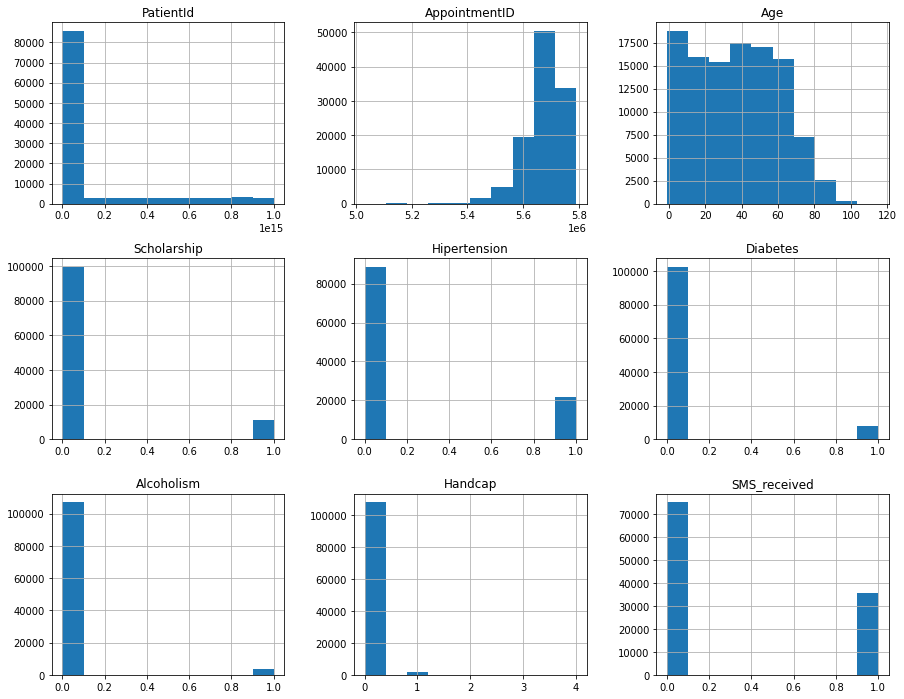

In [11]:
# A quick look at the distribution of data in each column

df.hist(figsize=(15,12));

### Data Cleaning: Fix The Issues Found In The Dataset

**-Solve the problem of minimum value of age**

In [12]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


**this row should be removed,**

In [13]:
index_of_bad_age = df.query('Age == -1').index[0]
df.drop(index_of_bad_age, inplace= True)

**check the numbers of rows**

In [14]:
df.shape

(110526, 14)

**number of rows decreased by one.**

<a id='eda'></a>
## Exploratory Data Analysis

**Note that 'No' mean the patient attended and 'Yes' mean not attended**

**The General statistics of data**

### Q1: What is the impact of the existence of handicap with different degrees and the attendence (No-show)?

**I will investigate the proportion values of no attendance to the total number of patients for each degree of handcap from 0 to 4,**

**- compute the proportion values: divide the number of non attended cases over the total number of cases for each handicap degree**

In [15]:
# Total number of cases for each type of handicap

total_cases_handicap = list()
for i in range(5):
    total_cases_handicap.append(df[df['Handcap']==i].shape[0])
total_cases_handicap

[108285, 2042, 183, 13, 3]

In [16]:
# Number of not attended cases for each handicap degree

handicap_number_not_atten = list()
for i in range(5):
    handicap_number_not_atten.append(df[df['No-show'] == 'Yes'][df['Handcap'] == i].shape[0])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [17]:
# Compute proportion values by dividing number of non attended cases over the total number of cases 
#for each handicap degree

relative_values = list()
for i in range(5):
    relative_values.append(handicap_number_not_atten[i]/total_cases_handicap[i])


**Visuallize the proportion values of non attended cases to the total number of cases for each degree of handicap**

In [18]:
# Create a function for plotting

def bar_Plot_handicap(x_values, y_values):
    # Bar plot for the studing of handicap variable, take values of x and y
    
    plt.bar(x_values, y_values, color = 'green')
    plt.title('the proportion values of "Yes" for "NO-show"')
    plt.xlabel('Degree of handicap')
    plt.ylabel('proportion value');

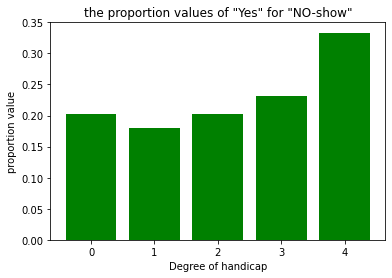

In [19]:
bar_Plot_handicap([0,1,2,3,4],relative_values)

**One can conclude that the increasing of handicap degree causes an increment the number of non attended cases: The increasing of the proportion of the number of non attended cases relative to the total number of cases in each degree of handicap.**

**Now, I will repeat the same steps but for attended cases.**

In [20]:
# The number of attended cases for each handicap degree

handicap_number_atten = list()
for i in range(5):
    handicap_number_atten.append(df[df['No-show'] == 'No'][df['Handcap'] == i].shape[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [21]:
# Compute proportion values by dividing number of attending cases over the total cases for each handicap degree

relative_values_2 = list()
for i in range(5):
    relative_values_2.append(handicap_number_atten[i]/total_cases_handicap[i])

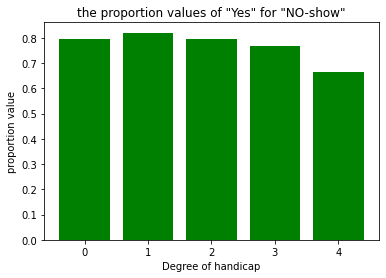

In [22]:
bar_Plot_handicap([0,1,2,3,4], relative_values_2)

**Increment of handicap degree cause a decrease of attending. Two visualizations give the same conclusion about the relationship between attendance and degree of handicap.** 

### Q2: Is there a correlation between the age of patients and the attendance?

In [23]:
# list of unique ages

unique_ages = df['Age'].unique().tolist()

In [24]:
# Total number of cases for each unique age

total_cases_age = list()
for i in unique_ages:
    total_cases_age.append(df[df['Age']==i].shape[0])

In [25]:
# Number of non attended cases for each age

age_number_not_atten = list()
for i in unique_ages:
    age_number_not_atten.append(df[df['No-show'] == 'Yes'][df['Age'] == i].shape[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [26]:
# Compute proportion values by dividing number of non attended cases over the total number of cases
# for each unique age

relative_values_3 = list()
for i in range(len(unique_ages)):
    relative_values_3.append(age_number_not_atten[i]/total_cases_age[i])


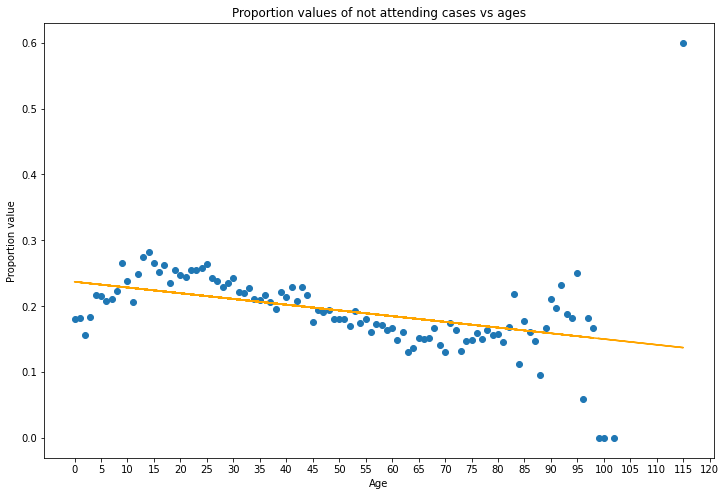

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(unique_ages, relative_values_3)
plt.title("Proportion values of not attending cases vs ages")
plt.xlabel("Age")
plt.ylabel('Proportion value')
plt.xticks(range(0, 121, 5))

# Plot the trending line
z = np.polyfit(unique_ages, relative_values_3, 1)
p = np.poly1d(z)
plt.plot(unique_ages, p(unique_ages), color = 'orange');


**Investigation of age variable indicates that, by trend line of the previous figure, there is a negative correlation between age and non attended cases number.**

**More investigation by the following figure,**

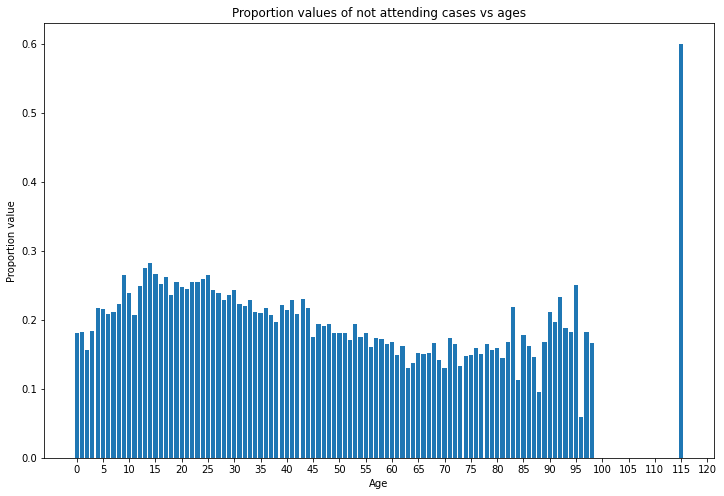

In [28]:
plt.figure(figsize=(12,8))
plt.bar(unique_ages, relative_values_3)
plt.title("Proportion values of not attending cases vs ages")
plt.xlabel("Age")
plt.ylabel('Proportion value')
plt.xticks(range(0, 121, 5));

###### By more investigation and according to age variable, we can see the two major behaviour:
**<br>-For ages less than 25, the proportion value for non-attended cases is increasing (positive correlation with age variable).
 <br>-For ages greater than 25 to 80, the correlation becomes negative.**

### Q3: Is alcoholism effect the attendence rate?

In [29]:
# For alcoholism patients
# The number of 'Yes' and 'No' of 'No-show'

alcohol = df.query('Alcoholism == 1')['No-show'].value_counts()

In [30]:
# Proportion of attended cases number to non attended cases number

alcohol_rate = alcohol[0]/alcohol[1]
alcohol_rate

3.9630723781388477

In [31]:
# For non-alcoholism patients
# Number of 'Yes' and 'No' of 'No-show'

non_alcohol = df.query('Alcoholism == 0')['No-show'].value_counts()

In [32]:
# Proportion of attended cases number to non-attended cases number

nonalcohol_rate = non_alcohol[0]/non_alcohol[1]

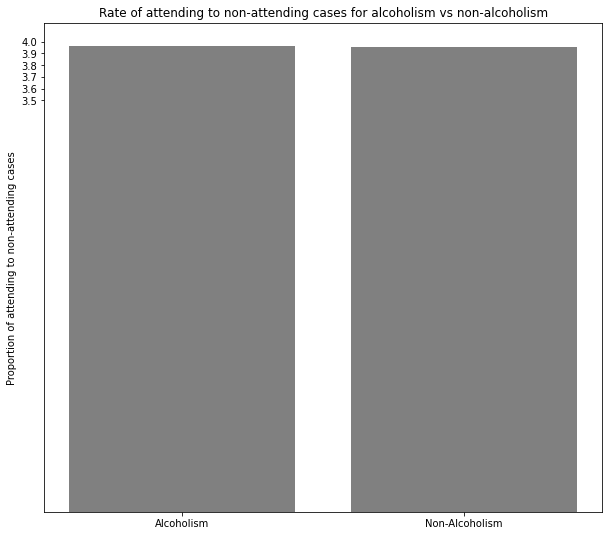

In [33]:
plt.figure(figsize=(10,9))
plt.bar(['Alcoholism', 'Non-Alcoholism'], [alcohol_rate, nonalcohol_rate], color = 'gray')
plt.title('Rate of attending to non-attending cases for alcoholism vs non-alcoholism')
plt.ylabel('Proportion of attending to non-attending cases')
plt.yticks(np.arange(3.5,4.1,.1));

**Clearly, no effect of alcoholism on attended and non-attended rate**

### Q4: What is the highest five neighborhoods according to the non-attended rate?

In [34]:
# List of neibourhoods names

neighbour_list = df['Neighbourhood'].unique().tolist()

In [35]:
# Total number of patients in each neighborhood

total_cases_neighbor = list()
for i in neighbour_list:
    total_cases_neighbor.append(df[df['Neighbourhood'] == i].shape[0])

In [36]:
# Number of non-attending patients

neighbor_number_non_attending = list()
for i in neighbour_list:
    neighbor_number_non_attending.append(df[df['Neighbourhood'] == i][df['No-show'] == 'Yes'].shape[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [37]:
# Proportion of non attended cases to the total number of cases

relative_values_4 = list()
for i in range(len(total_cases_neighbor)):
    relative_values_4.append(neighbor_number_non_attending[i]/total_cases_neighbor[i])

In [38]:
# Create a dict to store proportion value for each neighborhood

neighbour_dict = dict()
j = 0
for i in neighbour_list:
    neighbour_dict[i] = relative_values_4[j]
    j += 1

In [39]:
# Sort proportion values in descending order

relative_values_4.sort(reverse= True)

# Take the highest five values

highest_values = relative_values_4[:5]


In [40]:
# Print the highest neighborhoods by non attended rates

print('The highest five neighborhoods by non attended rate:')
for i, j in neighbour_dict.items():
    if j in highest_values:
        print(i.title())


The highest five neighborhoods by non attended rate:
Itararé
Santa Clara
Santos Dumont
Santa Cecília
Ilhas Oceânicas De Trindade


**I can suggest that may be this neighborhoods has some difficults more than other neighborhoods, like distances or transportation from neighborhood to medical clinic.**

<a id='conclusions'></a>
## Conclusions

### Results:

**There is a correlation between handicap degree and the rate of attendance, high handicap degree then, low attendance rate.**

**In general, there is a negative correlation between the age variable and the rate of attendance. By more investigation, you can note that there are two major correlation behavior; less than 25 to 80 years old, the correlation is positive and larger than 25 years old, the correlation becomes negative as the trend line.**

**Alcoholism didn't affect the rate of attendance of patients.**

**The highest five neighborhoods according to the non-attended patients are Itararé, Santa Clara, Santos Dumont, Santa Cecília, Ilhas Oceânicas De Trindade. I can suggest that may be this neighborhoods has some difficults more than other neighborhoods, like distances or transportation from neighborhood to medical clinic.**

### Limitations:

**Most of characteristics take only two values 0 or 1 which made the deep investigation and the discovering the correlation is difficult.**

**More information like the distance between the medical clinic and the patient's home and the state of the weather will give us a chance to answer the question (Why do 30% of patients miss their scheduled appointments?) high.** 